In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import re

In [73]:
def resize(img, output_dim=None):
    if output_dim:
        output_width = output_dim[0]
        output_height = output_dim[1]
    else:
        output_width = img.shape[1]
        output_height = img.shape[0]

    # resize input image
    output_img = cv2.resize(img, (output_width, output_height))
    return output_img

def zoom(img, zoom_max = 10, zoom_min = 5):

    zoom_lst = list(range(zoom_min, zoom_max + 1))
    idx = random.randrange((zoom_max - zoom_min + 1))
    zoom_px = zoom_lst[idx]

    half_zoom = zoom_px // 2

    img_width = img.shape[1]
    img_height = img.shape[0]

    output_img = img[half_zoom:(img_height - half_zoom), half_zoom:(img_width - half_zoom)]

    output_img = resize(output_img, output_dim=(img_width, img_height))

    return output_img

def shift(img, shift_max = 10, shift_min = 5):
    '''returns 4 shifted images in a tuple:
            (left_shift, up_shift, right_shift, down_shift)
    '''

    shift_lst = list(range(shift_min, shift_max + 1))
    left_shift, up_shift, right_shift, down_shift = random.sample(shift_lst, 4)
    left_resize, up_resize, right_resize, down_resize = [v > 0.5 for v in np.random.random(size=4)]
    img_width = img.shape[1]
    img_height = img.shape[0]

    img_left = resize(img[:, :(img_width - left_shift)], output_dim=(img_width, img_height)) if left_resize else img[:, :(img_width - left_shift)]
    img_up = resize(img[:(img_height - up_shift), :], output_dim=(img_width, img_height)) if up_resize else img[:(img_height - up_shift), :]
    img_right = resize(img[:(img_height - right_shift), :], output_dim=(img_width, img_height)) if right_resize else img[:(img_height - right_shift), :]
    img_down = resize(img[:(img_height - down_shift), :], output_dim=(img_width, img_height)) if down_resize else img[:(img_height - down_shift), :]

    return (img_left, img_up, img_right, img_down)

def altered_img(img, zoom_max = 10, zoom_min = 5, shift_max = 10, shift_min = 5):
    img_zoom = zoom(img, zoom_max, zoom_min)
    img_left, img_up, img_right, img_down = shift(img, shift_max, shift_min)

    return [img_zoom, img_left, img_up, img_right, img_down]

def read_img(fpath):
    return plt.imread(fpath)

def generate_alt_imgs(fpath, zoom_max = 10, zoom_min = 5, shift_max = 10, shift_min = 5):
    img = read_img(fpath)
    return altered_img(img, zoom_max, zoom_min, shift_max, shift_min)

def generate_alt_img_fpaths(fpath):
    dirpath, fname = os.path.split(fpath)
    fbase, ext = os.path.splitext(fname)

    new_fpaths = []
    for alt in ['zoom', 'left', 'up', 'right', 'down']:
        new_fbase = f'{fbase}_{alt}'
        new_fpath = os.path.join(dirpath, new_fbase + ext)
        new_fpaths.append(new_fpath)

    return new_fpaths

def generate_and_save_imgs(fpath, zoom_max = 10, zoom_min = 5, shift_max = 10, shift_min = 5):

    img_fpath_data_list = list(zip(generate_alt_img_fpaths(fpath), generate_alt_imgs(fpath, zoom_max, zoom_min, shift_max, shift_min)))
    print(f'successfully generated alternate images...')
    for fpath, img in img_fpath_data_list:
        plt.imsave(fpath, img)
    print(f'successfully saved alternate images.')
    return


In [9]:
DATA_DIR = '../data'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
BRACES_DIR = os.path.join(TRAIN_DIR, 'braces')
NOBRACES_DIR = os.path.join(TRAIN_DIR, 'no_braces')

In [91]:
original_img_re = re.compile(r'[0-9]{6}\.[A-Za-z]{1,3}')
braces_fpaths = [os.path.join(BRACES_DIR, fname) for fname in os.listdir(BRACES_DIR) if original_img_re.match(fname)]
nobraces_fpaths = [os.path.join(NOBRACES_DIR, fname) for fname in os.listdir(NOBRACES_DIR) if original_img_re.match(fname)]

In [83]:
img_fpaths = braces_fpaths + nobraces_fpaths

In [74]:
for img_fpath in img_fpaths:
    print(f'supplementing {img_fpath}...')
    generate_and_save_imgs(img_fpath, zoom_max = 15, zoom_min = 5, shift_max = 15, shift_min = 5)
    print('='*50)

supplementing ../data\train\braces\000001.jpg...
successfully generated alternate images...
successfully saved alternate images.
supplementing ../data\train\braces\000002.jpg...
successfully generated alternate images...
successfully saved alternate images.
supplementing ../data\train\braces\000003.jpg...
successfully generated alternate images...
successfully saved alternate images.
supplementing ../data\train\braces\000004.jpg...
successfully generated alternate images...
successfully saved alternate images.
supplementing ../data\train\braces\000005.jpg...
successfully generated alternate images...
successfully saved alternate images.
supplementing ../data\train\braces\000006.jpg...
successfully generated alternate images...
successfully saved alternate images.
supplementing ../data\train\braces\000007.jpg...
successfully generated alternate images...
successfully saved alternate images.
supplementing ../data\train\braces\000008.jpg...
successfully generated alternate images...
succe

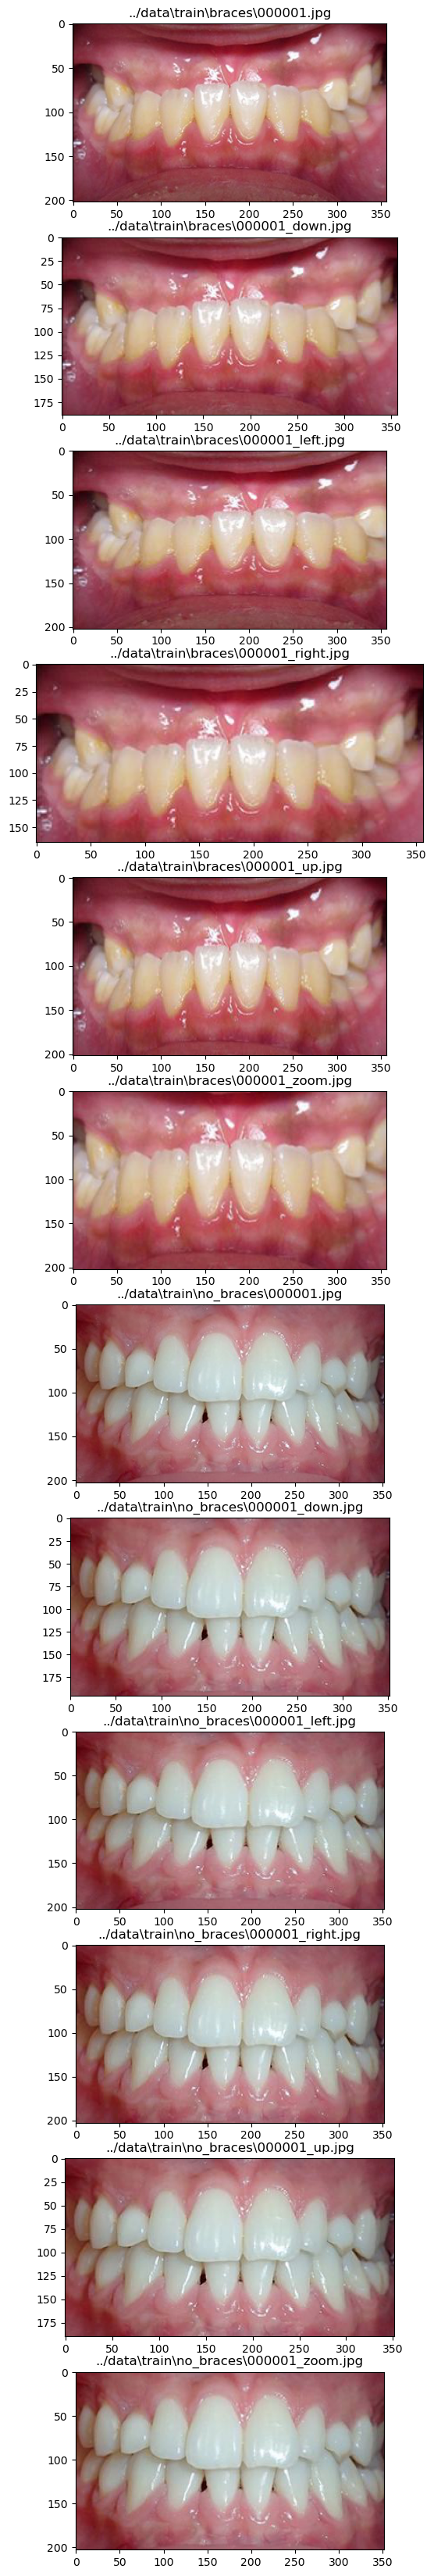

In [95]:
img_1_fpath = img_fpaths[0]
a = os.path.splitext(os.path.split(img_1_fpath)[1])[0]
img_1_arr = [fpath for fpath in img_fpaths if a in fpath]

fig, axs = plt.subplots(nrows=len(img_1_arr), ncols=1, figsize=(8, 42))
for i, fpath in enumerate(img_1_arr):
    axs[i].set_title(fpath)
    axs[i].imshow(plt.imread(fpath))